In [1]:
import os
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] = le.fit_transform(data[column])

data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0
5,34,4,216864,11,9,0,8,4,4,0,0,3770,45,39,0
6,38,4,150601,0,6,5,1,4,4,1,0,3770,40,39,0
7,74,7,88638,10,16,4,10,2,4,0,0,3683,20,39,1
8,68,1,422013,11,9,0,10,1,4,0,0,3683,40,39,0
9,41,4,70037,15,10,4,3,4,4,1,0,3004,60,0,1


In [7]:
data.shape

(32561, 15)

In [8]:
x = data.iloc[:,:-1]
x.shape

(32561, 14)

In [9]:
y = data.iloc[:,-1]

In [10]:
y.shape

(32561,)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)

In [13]:
gnb = GaussianNB()

In [14]:
print('Start training..')
tStart = time()
gnb.fit(x_train, y_train)
tEnd = time()
print('Training time:', round(tEnd-tStart, 3), "s")

# making predictions on the testing set
y_pred = gnb.predict(x_test)
print('Accuracy:' , metrics.accuracy_score(y_test, y_pred)*100)

Start training..
Training time: 0.295 s
Accuracy: 79.70213419315215


In [15]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is:', cm, sep='\n')

Confusion Matrix is:
[[4694  249]
 [1073  497]]


In [18]:
probs = gnb.predict_proba(x_test)
probs

array([[9.94127805e-01, 5.87219529e-03],
       [5.26519573e-05, 9.99947348e-01],
       [9.98514257e-01, 1.48574291e-03],
       ...,
       [9.75423786e-01, 2.45762135e-02],
       [0.00000000e+00, 1.00000000e+00],
       [1.25324660e-04, 9.99874675e-01]])

In [19]:
from sklearn import metrics
prob_positive = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prob_positive)
roc_auc = metrics.auc(fpr, tpr)
print('Area under the curve:', roc_auc)

Area under the curve: 0.8392115982068189


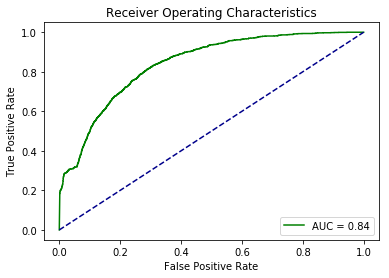

In [23]:
# plot ROC
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristics')
plt.plot(fpr,tpr,'green', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle ='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [2]:
import sklearn
sklearn.__version__

'0.20.1'